In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from pandas.plotting import autocorrelation_plot

In [19]:
path = r'C:\\Users\\cptm\Documents\\GitHub\\escala1' # use your path
all_files = glob.glob(path + "\\*csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, encoding = 'latin-1')
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [20]:
df = df[['SolicitacaoId', 'GrupoSistemaDescricao','LaboratorioId', 'Quantidade','SiglaArea','DataSolicitacao','DataAnalise','OsmDataHora','OsmDataFechamento', 'DataRetira']]
print(df.shape)
df.head(10)

(6362, 10)


,SolicitacaoId,GrupoSistemaDescricao,LaboratorioId,Quantidade,SiglaArea,DataSolicitacao,DataAnalise,OsmDataHora,OsmDataFechamento,DataRetira
0,20799,SCAP (BLOQUEIO ELETRÔNICO),1,1,DOLS,02/01/2019 14:30:49,02/01/2019 16:03:44,03/01/2019 08:56:00,21/01/2019 15:10:00,30/01/2019 14:22:22
1,20800,MÁQUINAS E EQUIP. ELETROPORTÁTEIS,1,1,DOVV,02/01/2019 14:43:59,02/01/2019 16:04:39,10/01/2019 14:50:00,14/01/2019 08:10:00,18/01/2019 11:25:35
2,20804,MÁQUINAS E EQUIP. ELETROPORTÁTEIS,1,1,DOLS,02/01/2019 17:03:07,03/01/2019 07:39:58,11/02/2019 11:08:00,12/02/2019 11:11:00,NaN
3,20811,MÁQUINAS E EQUIP. ELETROPORTÁTEIS,1,1,DOEE,03/01/2019 08:49:13,03/01/2019 09:49:01,14/01/2019 10:36:00,29/10/2019 08:58:00,08/11/2019 10:54:29
4,20812,MÁQUINAS E EQUIP. ELETROPORTÁTEIS,1,1,DOLS,03/01/2019 08:59:19,03/01/2019 09:48:33,09/01/2019 15:11:00,10/01/2019 14:30:00,10/01/2019 15:51:02
5,20813,MÁQUINAS E EQUIPAMENTOS FIXOS,1,1,DOVO,03/01/2019 09:14:36,03/01/2019 09:49:17,13/03/2019 09:49:00,15/05/2019 10:18:00,15/05/2019 11:08:32
6,20814,SCAP (BLOQUEIO ELETRÔNICO),1,1,DOLS,03/01/2019 09:48:22,03/01/2019 09:49:28,07/01/2019 17:31:00,29/01/2019 08:19:00,29/01/2019 11:31:54
7,20815,SCAP (BLOQUEIO ELETRÔNICO),1,1,DOLS,03/01/2019 09:56:05,03/01/2019 09:56:21,05/02/2019 09:26:00,06/02/2019 09:53:00,19/02/2019 09:03:59
8,20817,TELECOMUNICAÇÕES,1,1,DOLS,03/01/2019 11:36:28,03/01/2019 11:41:11,09/01/2019 17:00:00,16/01/2019 09:43:00,17/01/2019 08:56:51
9,20819,TELECOMUNICAÇÕES,1,1,DOLS,03/01/2019 11:43:18,03/01/2019 11:44:07,09/01/2019 16:59:00,16/01/2019 09:39:00,17/01/2019 08:56:51


In [21]:
def convertDateToString(dateString):
    dateString = dateString.split(sep=" ")[0]
    convertedDate = datetime.strptime(dateString, '%d/%m/%Y')
    return convertedDate

df = df[df['DataSolicitacao'].notna()]
df['DataSolicitacao'] = df['DataSolicitacao'].apply(convertDateToString)
#df['DataAnalise'] = df['DataAnalise'].apply(convertDateToString)
#df['OsmDataHora'] = df['OsmDataHora'].apply(convertDateToString)
#df['OsmDataFechamento'] = df['OsmDataFechamento'].apply(convertDateToString)
#df['DataRetira'] = df['DataRetira'].apply(convertDateToString)

In [22]:
print(df.shape)
df.head()

(6362, 10)


,SolicitacaoId,GrupoSistemaDescricao,LaboratorioId,Quantidade,SiglaArea,DataSolicitacao,DataAnalise,OsmDataHora,OsmDataFechamento,DataRetira
0,20799,SCAP (BLOQUEIO ELETRÔNICO),1,1,DOLS,2019-01-02,02/01/2019 16:03:44,03/01/2019 08:56:00,21/01/2019 15:10:00,30/01/2019 14:22:22
1,20800,MÁQUINAS E EQUIP. ELETROPORTÁTEIS,1,1,DOVV,2019-01-02,02/01/2019 16:04:39,10/01/2019 14:50:00,14/01/2019 08:10:00,18/01/2019 11:25:35
2,20804,MÁQUINAS E EQUIP. ELETROPORTÁTEIS,1,1,DOLS,2019-01-02,03/01/2019 07:39:58,11/02/2019 11:08:00,12/02/2019 11:11:00,NaN
3,20811,MÁQUINAS E EQUIP. ELETROPORTÁTEIS,1,1,DOEE,2019-01-03,03/01/2019 09:49:01,14/01/2019 10:36:00,29/10/2019 08:58:00,08/11/2019 10:54:29
4,20812,MÁQUINAS E EQUIP. ELETROPORTÁTEIS,1,1,DOLS,2019-01-03,03/01/2019 09:48:33,09/01/2019 15:11:00,10/01/2019 14:30:00,10/01/2019 15:51:02


In [23]:
def plotar (titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax
    
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18,loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

In [24]:
df1 = df.groupby('DataSolicitacao', as_index=False)['Quantidade'].sum()
df1['aumento'] = df1['Quantidade'].diff()
df1['aceleracao'] = df1['aumento'].diff()
print(df1.shape)
print(df1.dtypes)
df1.head(10) 

(687, 4)
DataSolicitacao    datetime64[ns]
Quantidade                  int64
aumento                   float64
aceleracao                float64
dtype: object


,DataSolicitacao,Quantidade,aumento,aceleracao
0,2019-01-02,3,NaN,NaN
1,2019-01-03,14,11.0,NaN
2,2019-01-04,4,-10.0,-21.0
3,2019-01-06,2,-2.0,8.0
4,2019-01-07,17,15.0,17.0
5,2019-01-08,20,3.0,-12.0
6,2019-01-09,13,-7.0,-10.0
7,2019-01-10,15,2.0,9.0
8,2019-01-11,10,-5.0,-7.0
9,2019-01-12,1,-9.0,-4.0


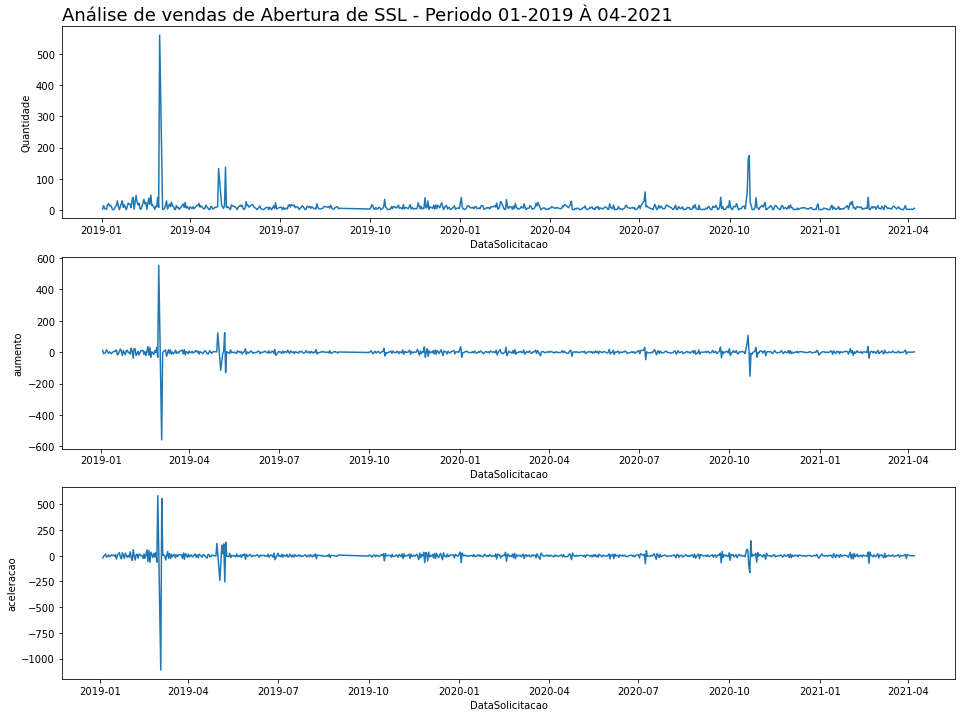

In [31]:
plot_comparacao('DataSolicitacao', 'Quantidade', 'aumento', 'aceleracao',
              df1, 'Análise de vendas de Abertura de SSL - Periodo 01-2019 À 04-2021')

In [26]:
df1['dia_da_semana'] = df1['DataSolicitacao'].dt.strftime("%A")
df1.head()

,DataSolicitacao,Quantidade,aumento,aceleracao,dia_da_semana
0,2019-01-02,3,NaN,NaN,Wednesday
1,2019-01-03,14,11.0,NaN,Thursday
2,2019-01-04,4,-10.0,-21.0,Friday
3,2019-01-06,2,-2.0,8.0,Sunday
4,2019-01-07,17,15.0,17.0,Monday


In [27]:
df1['dia_da_semana'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday',
       'Saturday'], dtype=object)

In [28]:
dias_traduzidos = {'Monday':'Segunda', 'Tuesday':'Terca', 'Wednesday':'Quarta',
                   'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado',
       'Sunday':'Domingo'}
df1['dia_da_semana'] = df1['dia_da_semana'].map(dias_traduzidos)


In [29]:
df1.head()

,DataSolicitacao,Quantidade,aumento,aceleracao,dia_da_semana
0,2019-01-02,3,NaN,NaN,Quarta
1,2019-01-03,14,11.0,NaN,Quinta
2,2019-01-04,4,-10.0,-21.0,Sexta
3,2019-01-06,2,-2.0,8.0,Domingo
4,2019-01-07,17,15.0,17.0,Segunda


In [30]:
df1.head(10)

,DataSolicitacao,Quantidade,aumento,aceleracao,dia_da_semana
0,2019-01-02,3,NaN,NaN,Quarta
1,2019-01-03,14,11.0,NaN,Quinta
2,2019-01-04,4,-10.0,-21.0,Sexta
3,2019-01-06,2,-2.0,8.0,Domingo
4,2019-01-07,17,15.0,17.0,Segunda
5,2019-01-08,20,3.0,-12.0,Terca
6,2019-01-09,13,-7.0,-10.0,Quarta
7,2019-01-10,15,2.0,9.0,Quinta
8,2019-01-11,10,-5.0,-7.0,Sexta
9,2019-01-12,1,-9.0,-4.0,Sabado


In [33]:
solicitacoes = df1.groupby('dia_da_semana')['Quantidade', 'aumento', 'aceleracao'].mean().round()
solicitacoes.head()

<ipython-input-33-a34a4d6d6a5c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  solicitacoes = df1.groupby('dia_da_semana')['Quantidade', 'aumento', 'aceleracao'].mean().round()


,Quantidade,aumento,aceleracao
dia_da_semana,,,
Domingo,2.0,-3.0,4.0
Quarta,12.0,-0.0,-4.0
Quinta,10.0,-2.0,-2.0
Sabado,4.0,-6.0,-6.0
Segunda,10.0,1.0,-1.0


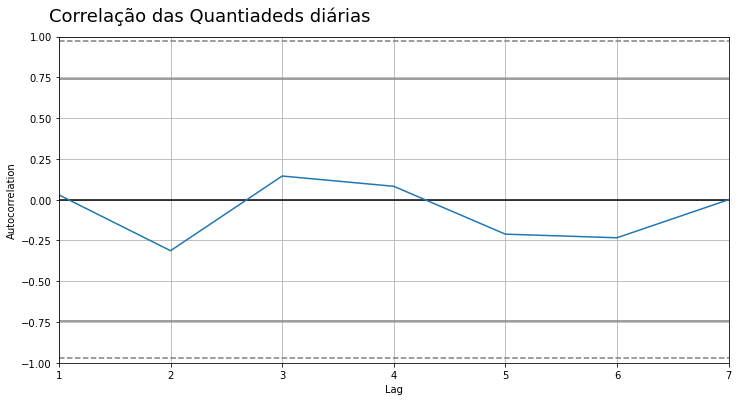

In [34]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Quantiadeds diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(solicitacoes['Quantidade'])
ax = ax

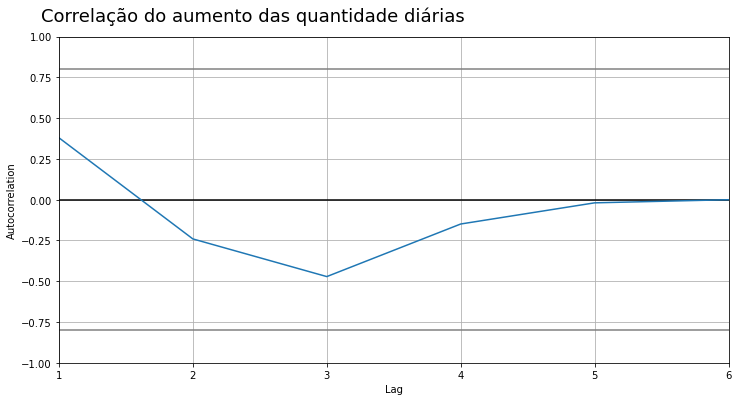

In [36]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das quantidade diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(solicitacoes['aumento'][1:])
ax = ax

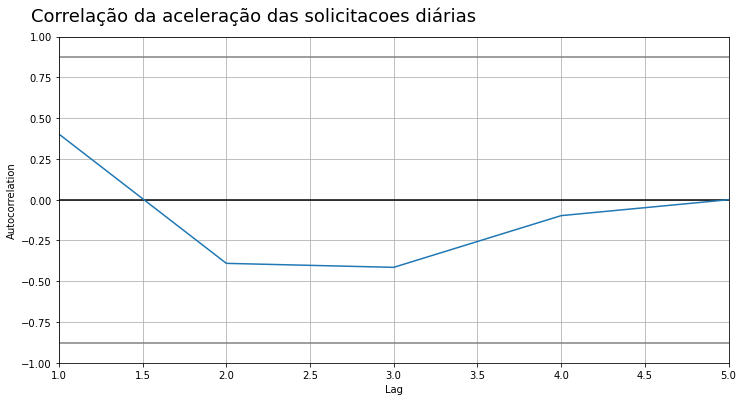

In [39]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das solicitacoes diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(solicitacoes['aceleracao'][2:])
ax = ax